In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os

# Experimentos del TP
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **EG**: Eliminacion Gaussiana.
- **LU**: Factorización LU.

# Experimentos
Leemos el dataframe con todos los resultados.

In [ ]:
df_resultados_tiempos = pd.read_csv("./resultados/resultado.csv");
df_resultados_tiempos = df_resultados_tiempos.assign(metodo=df_resultados_tiempos.metodo.map({"0": "EG", "1": "LU"}))

df_resultados_tiempos_EG = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "EG"]
df_resultados_tiempos_LU = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "LU"]


# Carga de .out

In [2]:
def cargar_archivo_a_dataframe(dataframe, archivo, instancia, radios, angulos, num_instancias):
    lista_temperaturas = []
    archivoEntrada = archivo.replace("resultados", "instancias")
    archivoEntrada = archivoEntrada.replace("out", "in")
    archivoEntrada = archivoEntrada.replace("_EG", "")
    archivoEntrada = archivoEntrada.replace("_LU", "")
    with open(archivo, 'r') as f:
        lista_temperaturas = f.read().splitlines()
    with open(archivoEntrada, "r") as entrada:
            lineas=entrada.read().splitlines()
            radioInterno = int(lineas[0].split(" ")[0])
            radioExterno = int(lineas[0].split(" ")[1])
    dataframe.loc[len(dataframe.index)] = [instancia, radioInterno, radioExterno, radios, angulos, num_instancias, lista_temperaturas]



df_instancia_unica = pd.DataFrame({'instancia': [],
                   'radioInterno':0,
                   'radioExterno':0,                
                   'radios': [],
                   'angulos': [],
                   'numero_de_instancias':[],
                   'lista_temperaturas': []})
df_multiples_instancias = pd.DataFrame({'instancia': [],
                   'radioInterno':0,
                   'radioExterno':0,
                   'radios': [],
                   'angulos': [],
                   'numero_de_instancias':[],
                   'lista_temperaturas': []})

instancias = os.listdir("resultados/")
for instancia in instancias: 
    if os.path.isdir(f"resultados/{instancia}"):
        resultados = os.listdir(f"resultados/{instancia}/")
        for resultado in resultados:
            cantRadios = "0"
            cantAngulos = "0"
            num_instancias = "0"
            if instancia == "instancia_ideal" or instancia == "instancia_intercalada":
                cantRadios = resultado.split("_")[0].split("X")[0]
                cantAngulos = resultado.split("_")[0].split("X")[1].split('.')[0]
                num_instancias = "1"
                cargar_archivo_a_dataframe(df_instancia_unica, f"./resultados/{instancia}/{resultado}", instancia, cantRadios, cantAngulos, num_instancias)
            elif instancia == "instancia_prendido" :
                cantRadios = "20"
                cantAngulos = "20"
                num_instancias = resultado.split("_")[1].split('.')[0]
                cargar_archivo_a_dataframe(df_multiples_instancias, f"./resultados/{instancia}/{resultado}", instancia, cantRadios, cantAngulos, num_instancias)
        
#df_instancia_unica.to_csv("./resultados/resultado_temperatura_unica_instancia.csv", index=False, header=True)
df_instancia_unica
#df_multiples_instancias.to_csv("./resultados/resultado_temperatura_multiples_instancias.csv", index=False, header=True)

,instancia,radioInterno,radioExterno,radios,angulos,numero_de_instancias,lista_temperaturas
0,instancia_intercalada,10,100,15,20,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
1,instancia_intercalada,10,100,45,20,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
2,instancia_intercalada,10,100,50,12,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
3,instancia_intercalada,10,100,5,40,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
4,instancia_intercalada,10,100,5,32,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
...,...,...,...,...,...,...,...
195,instancia_ideal,10,100,10,30,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
196,instancia_ideal,10,100,5,10,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
197,instancia_ideal,10,100,45,30,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."
198,instancia_ideal,10,100,35,5,1,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."


In [ ]:
df_resultados_tiempos

# Separamos los datos en diferentes dataframes

In [ ]:
df_resultados_inst_live_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_live_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [ ]:
df_resultados_ideal_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_ideal_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [ ]:
df_resultados_prendido_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_prendido_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [ ]:
df_resultados_intercalada_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_intercalada_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [ ]:
#grafico sobre la performance por cantidad de instancias
def getInstancesValue(row):
    return int(row.entrada.split("_")[2].split(".")[0])
    
df_resultados_prendido_con_inst_LU = df_resultados_inst_prendido_LU.copy();
df_resultados_prendido_con_inst_LU["ninst"] = df_resultados_prendido_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_LU =  df_resultados_prendido_con_inst_LU.sort_values(by="ninst")

    
df_resultados_prendido_con_inst_EG = df_resultados_prendido_EG.copy();
df_resultados_prendido_con_inst_EG["ninst"] = df_resultados_prendido_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_EG =  df_resultados_prendido_con_inst_EG.sort_values(by="ninst")



In [ ]:
#grafico sobre la performance por cantidad de instancias
    
df_resultados_live_con_inst_LU = df_resultados_inst_live_LU.copy();
df_resultados_live_con_inst_LU["ninst"] = df_resultados_live_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_LU =  df_resultados_live_con_inst_LU.sort_values(by="ninst")

    
df_resultados_live_con_inst_EG = df_resultados_inst_live_EG.copy();
df_resultados_live_con_inst_EG["ninst"] = df_resultados_live_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_EG =  df_resultados_live_con_inst_EG.sort_values(by="ninst")



In [ ]:
performanceLU=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_LU, hue="metodo");
performanceEG=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_EG, hue="metodo");
performanceLU.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceEG.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceLU.ax.invert_yaxis()
performanceEG.ax.invert_yaxis()
performanceLU.figure.savefig("performace-LU-prendido.png")
performanceEG.figure.savefig("performance-EG-prendido.png")
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_LU);
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_EG);

## heatmaps de performance


In [ ]:
#tomo los datos para el heatmap de performance
def getNFromInstance(row):
    res = ""
    look=row.entrada.split("X")[0]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def getMFromInstance(row):
    res = ""
    look=row.entrada.split("X")[1]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def toFloat(row):
    return float(row.tiempo)
datosIdealEG = df_resultados_ideal_EG.copy()
datosIdealEG["n"] = datosIdealEG.apply(lambda row: getNFromInstance(row), axis=1)
datosIdealEG["m"] = datosIdealEG.apply(lambda row: getMFromInstance(row), axis=1)
datosIdealEG["tiempo"]=datosIdealEG.apply(lambda row: toFloat(row), axis=1)
heatmapData = datosIdealEG.pivot(columns="m", index="n", values="tiempo")
heatmapData = heatmapData.sort_index(axis=0)
heatmapData = heatmapData.sort_index(axis=1)

sns.color_palette("cubehelix")
fig, axs = plt.subplots(1,1, figsize=(10, 10))


grafico=sns.heatmap(heatmapData, ax=axs, fmt="d", cmap="plasma", cbar_kws={'label': 'tiempo (ms)'})
grafico.invert_yaxis()
grafico.set(xlabel="cantidad de angulos", ylabel="cantidad de radios")
grafico.figure.savefig("heatmapPerformanceIdealEG")

In [ ]:
#tomo los datos para el heatmap de performance

datosIdealLU = df_resultados_inst_ideal_LU.copy()
datosIdealLU["n"] = datosIdealLU.apply(lambda row: getNFromInstance(row), axis=1)
datosIdealLU["m"] = datosIdealLU.apply(lambda row: getMFromInstance(row), axis=1)
datosIdealLU["tiempo"]=datosIdealLU.apply(lambda row: toFloat(row), axis=1)
heatmapData = datosIdealLU.pivot(columns="m", index="n", values="tiempo")
heatmapData = heatmapData.sort_index(axis=0)
heatmapData = heatmapData.sort_index(axis=1)

sns.color_palette("cubehelix")
fig, axs = plt.subplots(1,1, figsize=(10, 10))


grafico=sns.heatmap(heatmapData, ax=axs, fmt="d",cmap="plasma", cbar_kws={'label': 'tiempo (ms)'})
grafico.invert_yaxis()
grafico.set(xlabel="cantidad de angulos", ylabel="cantidad de radios")
grafico.figure.savefig("heatmapPerformanceIdealLU")

In [ ]:
#Este codigo es de ejemplo, usa datos aleatorios

cantidad_puntos = 50
r = np.random.normal(0.5, 0.05, cantidad_puntos)
r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
theta = np.linspace(0, 2*np.pi, cantidad_puntos)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rticks([10+90/3*x for x in range(4)])
ax.grid(True)

ax.set_title("Isoterma")
plt.show()

In [ ]:
cantidad_angulos = 20
cantidad_radios = 10
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*20


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

In [ ]:
cantidad_angulos = 200
cantidad_radios = 100
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*30


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

In [3]:

def mapaCalorDelHorno (archivo_salida, radio_interno, radio_externo, cantidad_radios, cantidad_angulos, temperaturas, titulo) :
    #theta es la forma de la matriz que luego es curvada
    theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
    #r es la forma fisica del horno
    r = np.tile(np.linspace(radio_interno, radio_externo, cantidad_radios), (cantidad_angulos, 1))
    #z son los valores del horno, cada fila es un rayo desde el centro hacia afuera del horno
    z = np.array(temperaturas).reshape((cantidad_radios, cantidad_angulos)).T

    max_temp = max(temperaturas)
    if max_temp < 1500 : max_temp = 1500

    min_temp = 0

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    grafico = ax.pcolor(theta, r, z, cmap='jet', vmax=max_temp, vmin=min_temp)
    ax.set_title(titulo)

    ax.set_yticklabels([])

    fig.colorbar(grafico)
    plt.savefig(archivo_salida)
    #plt.show()
    

<ipython-input-3-03d719074f7d>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  grafico = ax.pcolor(theta, r, z, cmap='jet', vmax=max_temp, vmin=min_temp)
<ipython-input-3-03d719074f7d>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})


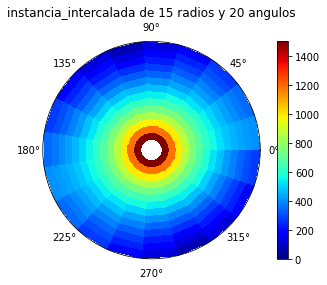

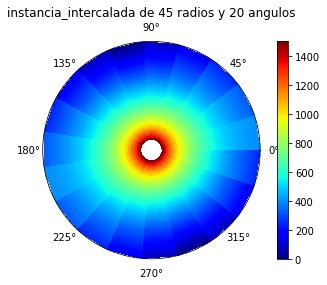

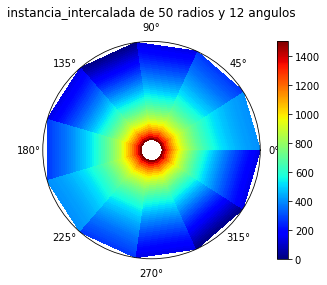

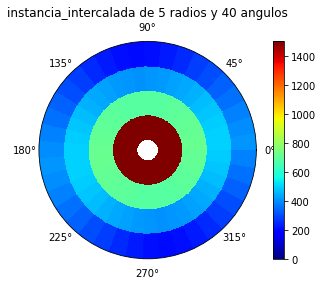

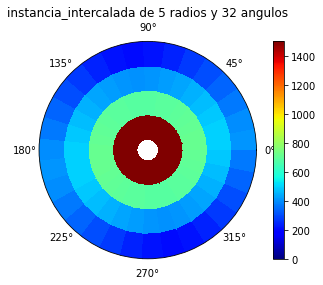

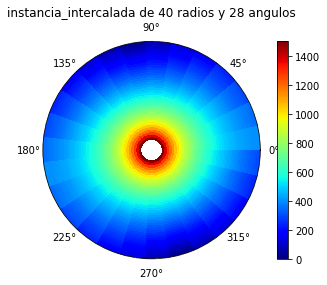

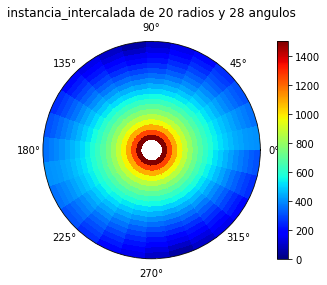

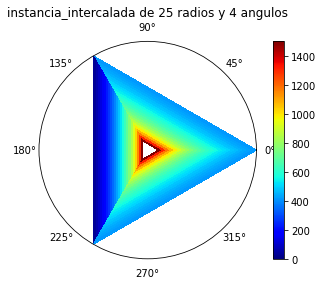

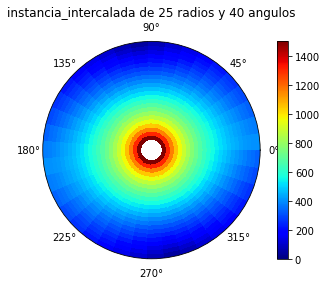

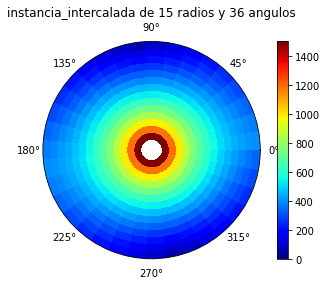

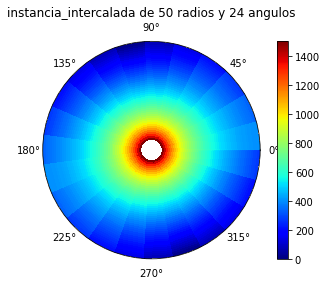

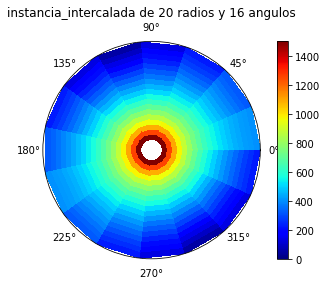

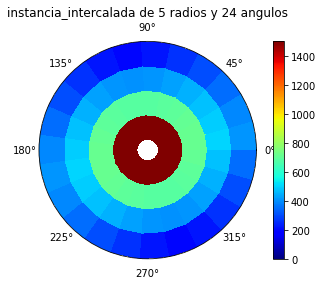

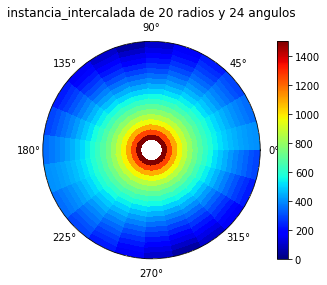

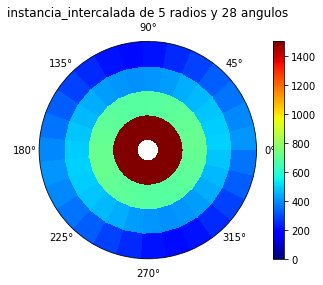

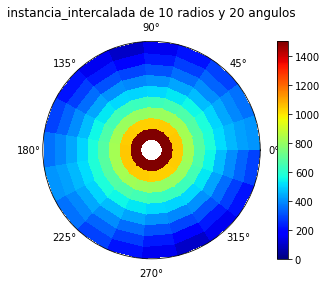

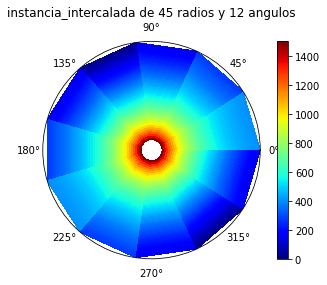

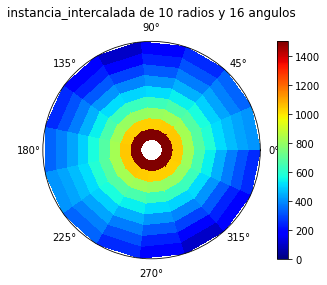

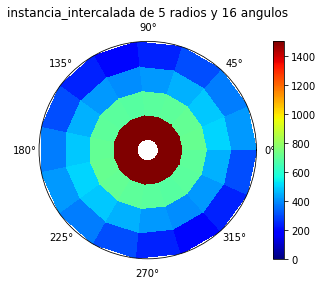

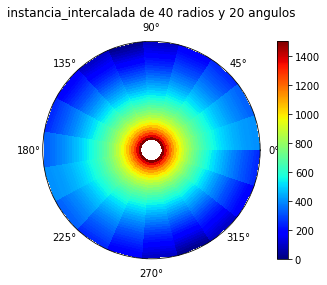

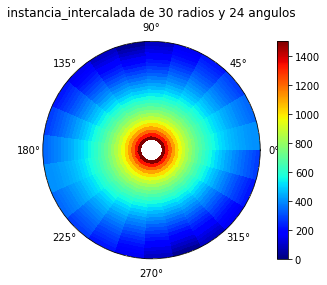

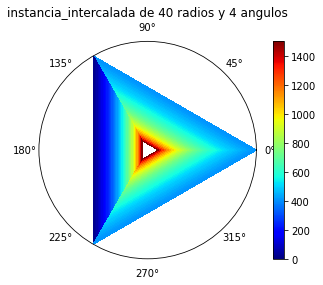

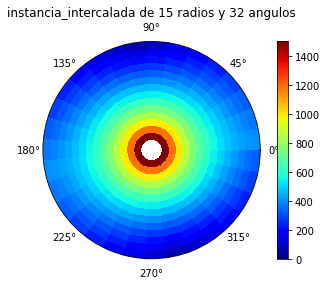

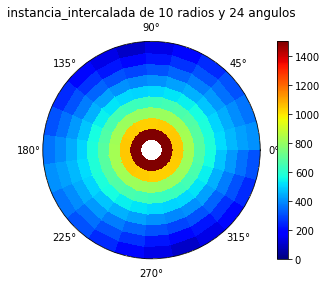

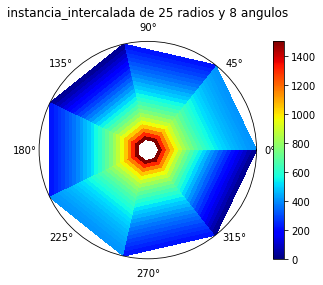

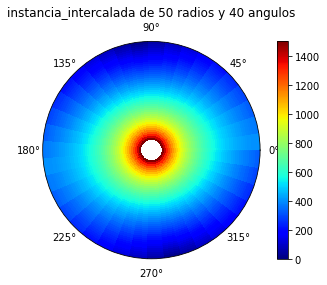

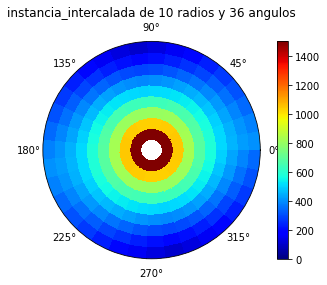

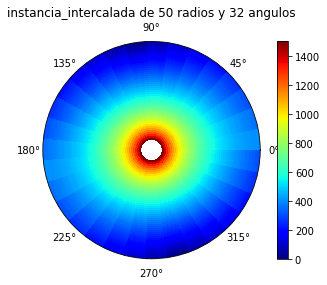

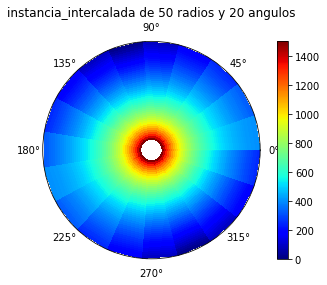

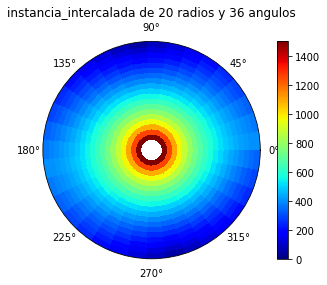

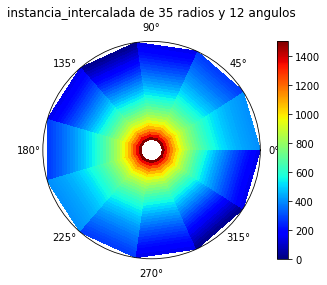

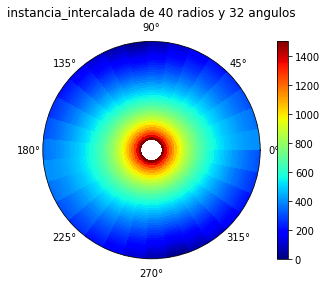

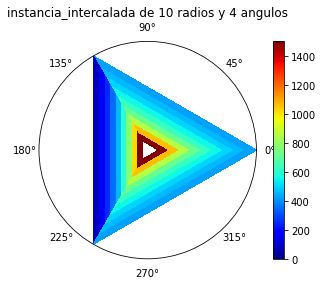

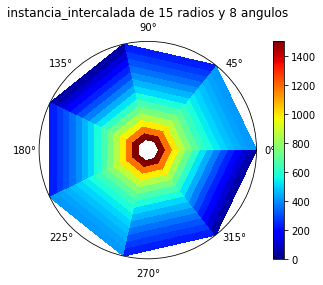

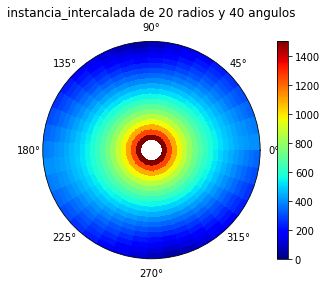

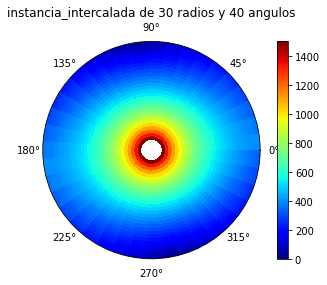

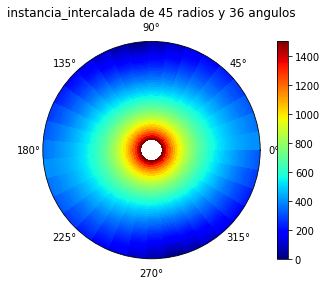

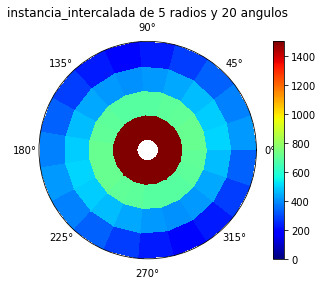

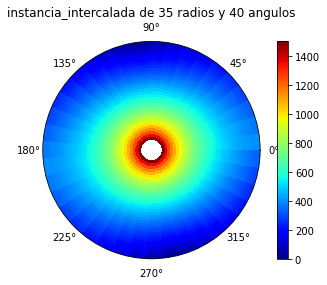

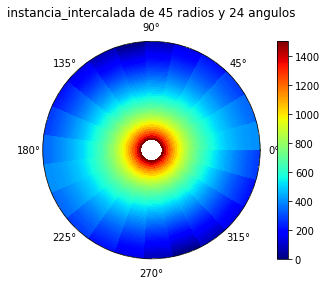

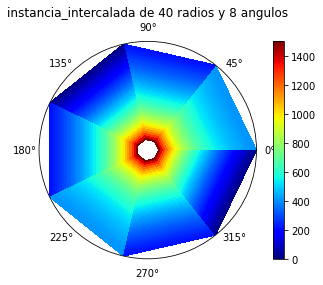

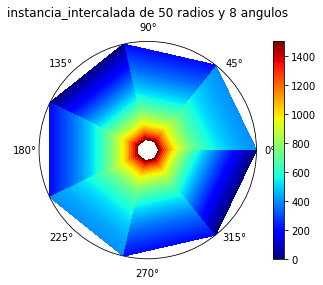

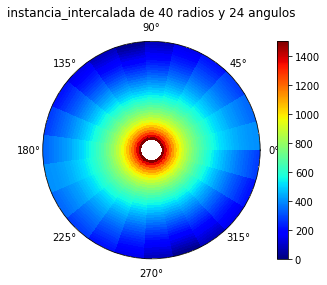

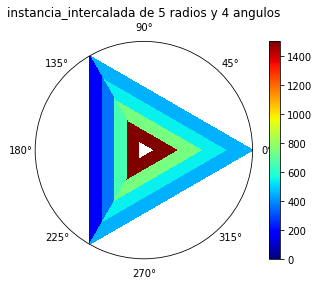

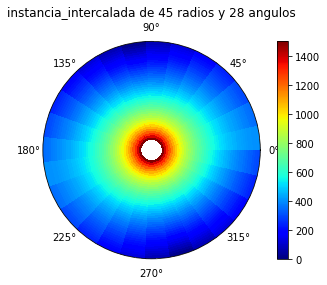

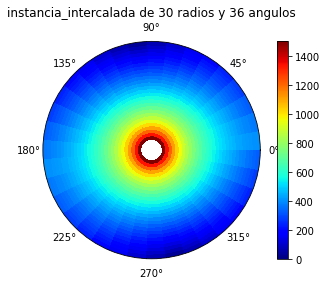

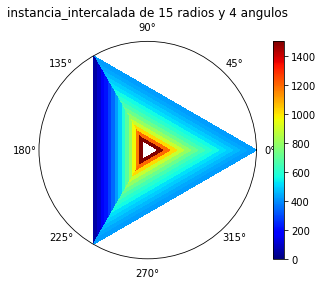

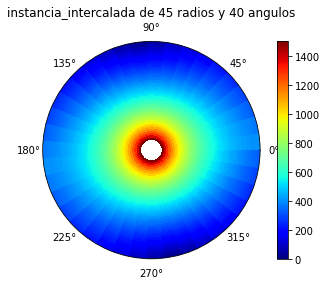

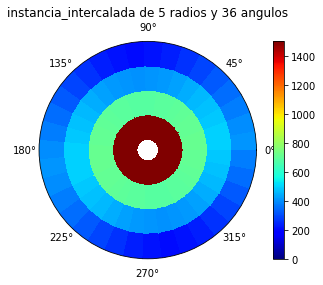

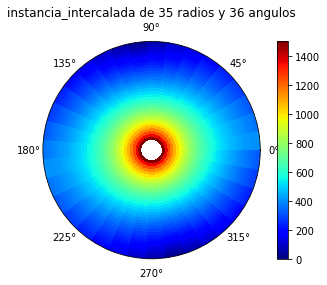

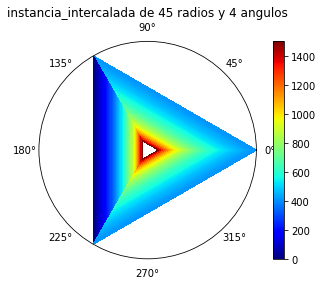

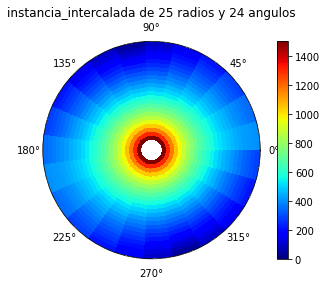

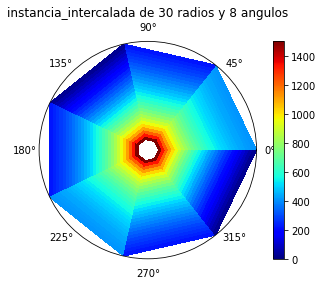

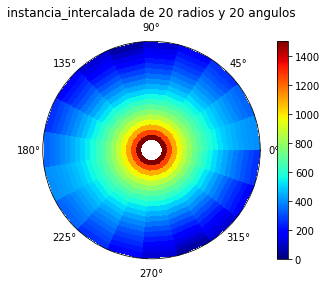

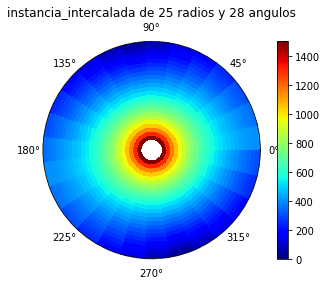

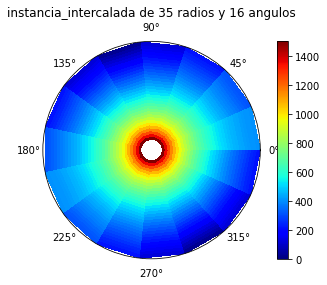

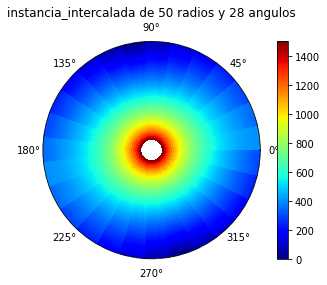

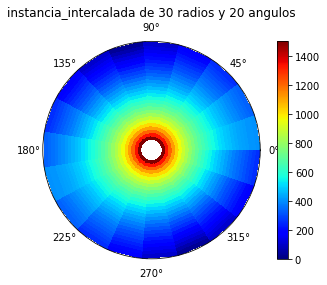

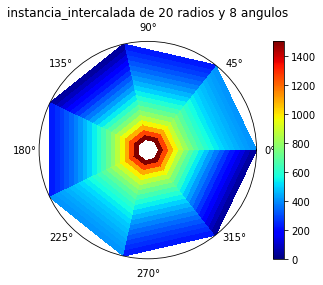

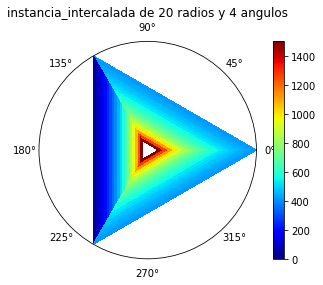

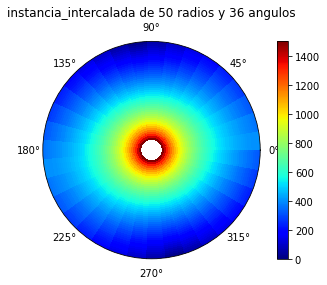

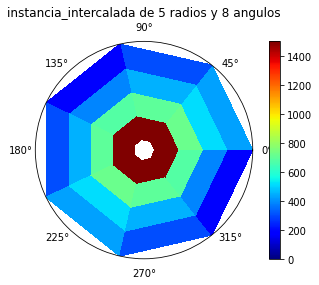

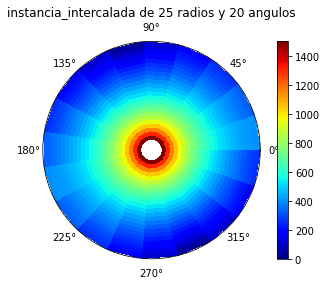

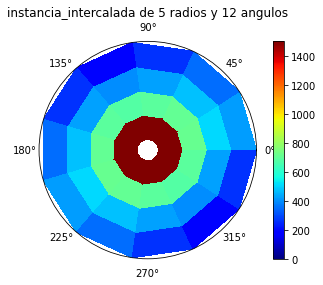

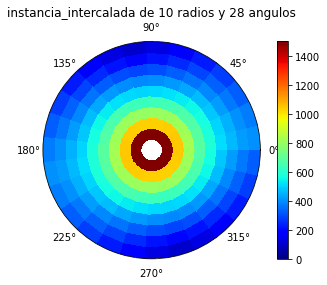

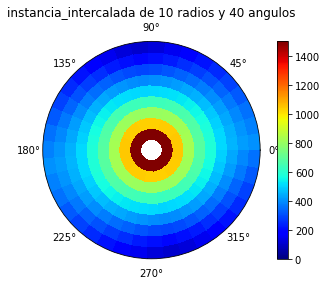

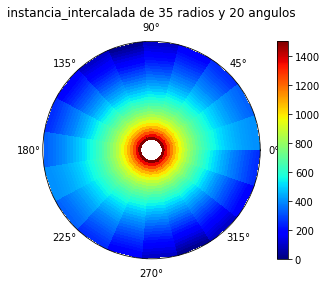

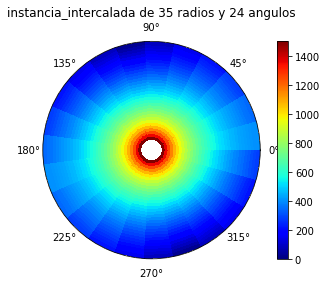

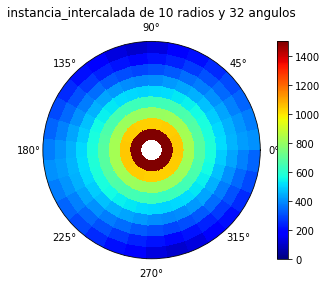

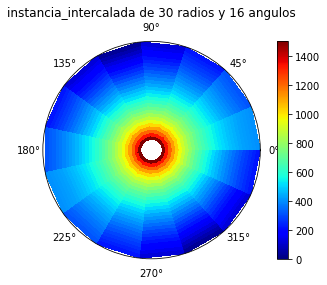

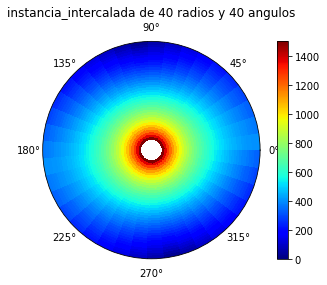

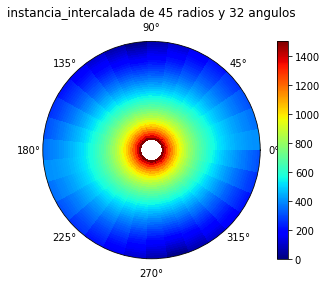

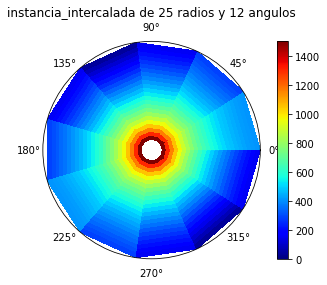

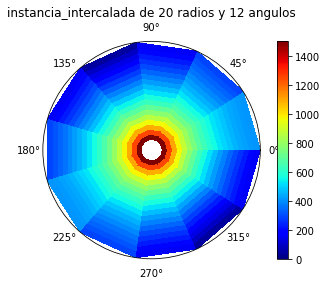

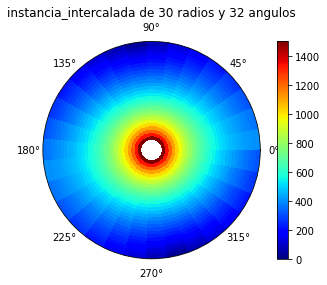

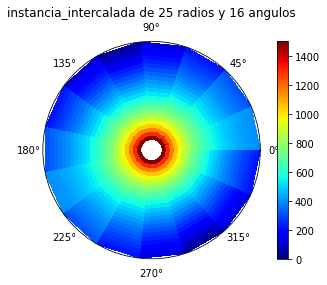

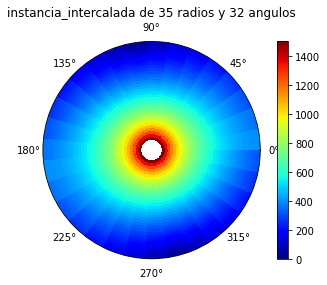

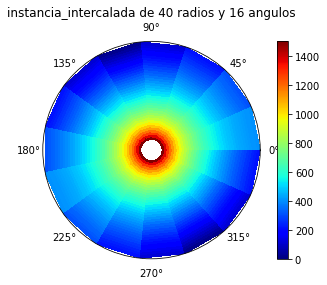

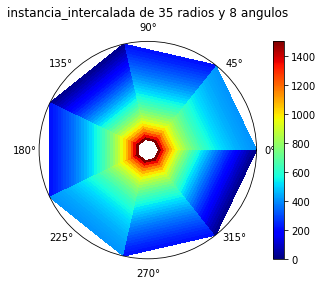

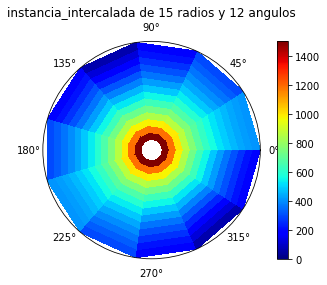

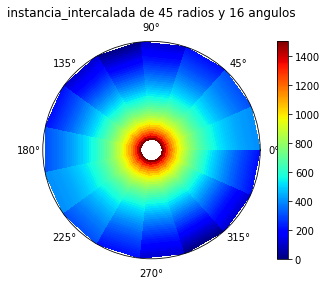

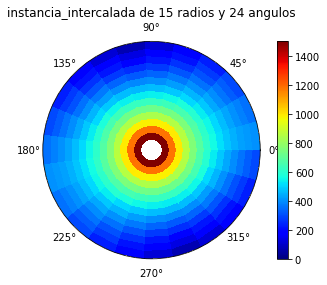

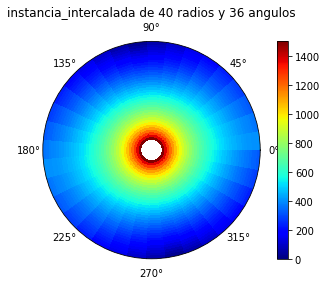

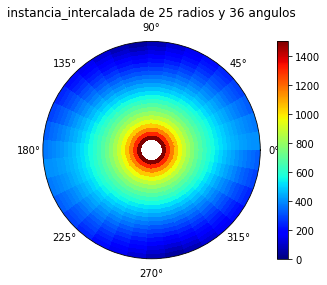

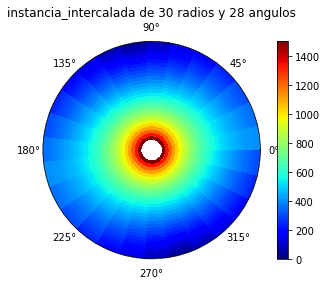

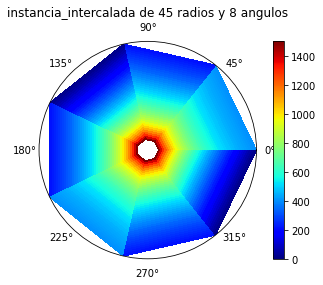

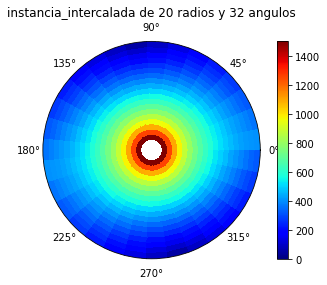

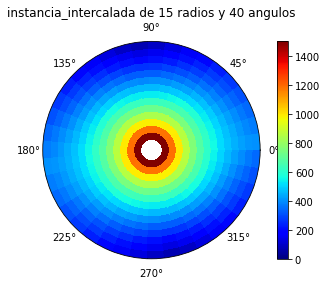

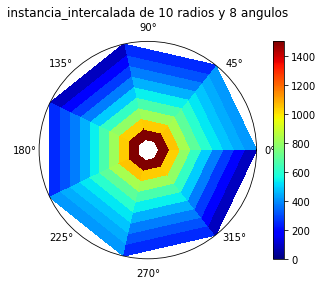

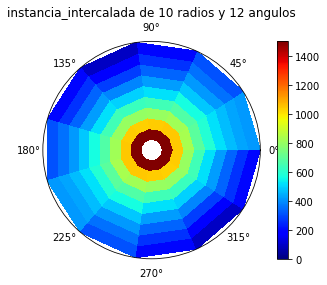

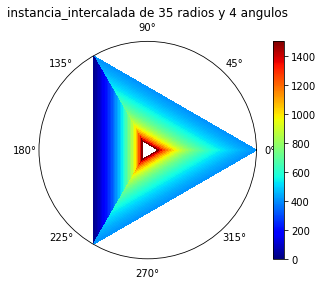

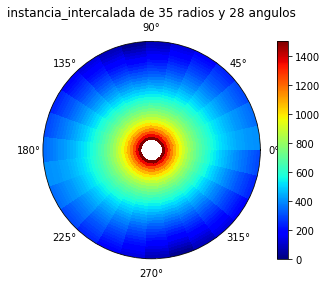

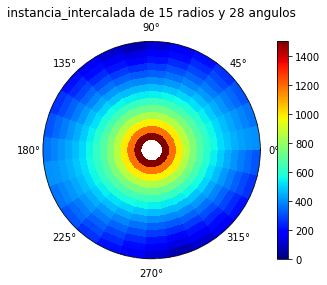

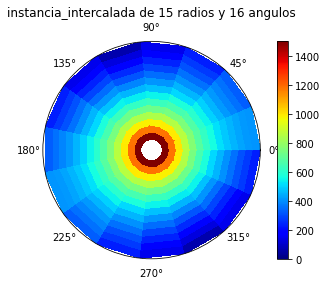

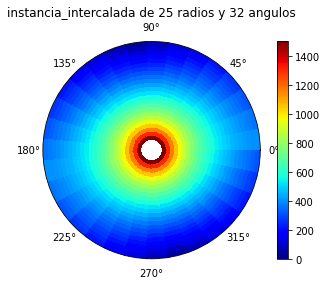

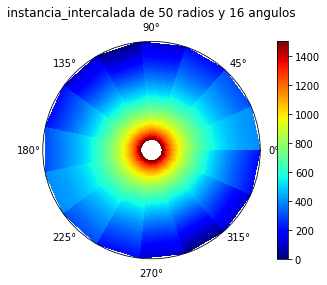

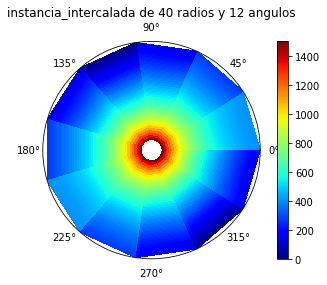

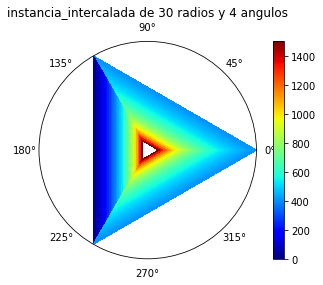

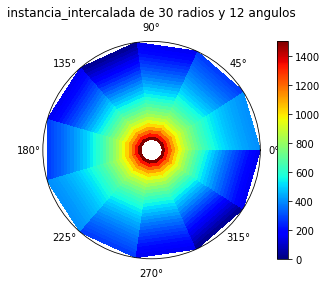

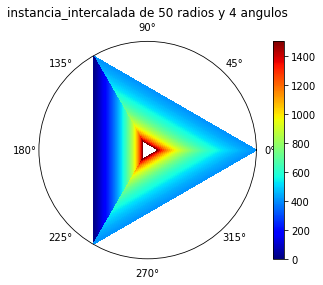

In [4]:
def graficar_temperaturas (tipo_instancia) :
    df = pd.DataFrame()
    if tipo_instancia == "instancia_intercalada" or tipo_instancia == "instancia_ideal" :
        df = df_instancia_unica[df_instancia_unica["instancia"]==tipo_instancia]
    elif tipo_instancia == "instancia_prendido" or tipo_instancia == "instancia_live" :
        df = df_multiples_instancias[df_multiples_instancias["instancia"]==tipo_instancia]

    df = df.reset_index() 

    for _, row in df.iterrows():
        instancias = 1
        for temperaturas in np.array(row["lista_temperaturas"]).reshape((int(row["numero_de_instancias"]), int(row["radios"])*int(row["angulos"]))) :
            if tipo_instancia == "instancia_intercalada" or tipo_instancia == "instancia_ideal" :
                mapaCalorDelHorno(f'./graficos/calor/{tipo_instancia}/{tipo_instancia}_{row["radios"]}X{row["angulos"]}.png', row["radioInterno"], row["radioExterno"], int(row["radios"]), int(row["angulos"]), np.array(list(map(float, temperaturas))), f'{tipo_instancia} de {row["radios"]} radios y {row["angulos"]} angulos' )
            elif tipo_instancia == "instancia_prendido" or tipo_instancia == "instancia_live" :
                mapaCalorDelHorno(f'./graficos/calor/{tipo_instancia}/{tipo_instancia}_{row["numero_de_instancias"]}_instancia_{instancias}.png', row["radioInterno"], row["radioExterno"], int(row["radios"]), int(row["angulos"]), np.array(list(map(float, temperaturas))), f'{tipo_instancia} instancia {instancias} / {row["numero_de_instancias"]}' )
            instancias += 1


graficar_temperaturas("instancia_intercalada")
#graficar_temperaturas("instancia_ideal")
#graficar_temperaturas("instancia_prendido")
#graficar_temperaturas("instancia_live")                                                

In [5]:
def calcular_isoterma_para_un_angulo_dado(valor_isoterma, lista_de_temperaturas_de_un_angulo):
    if(float(lista_de_temperaturas_de_un_angulo[0]) < valor_isoterma):
        return 0.0

    cantRadios = len(lista_de_temperaturas_de_un_angulo)
    radio_anterior = 0
    temperatura_anterior = 0
    temperatura_posterior = 0
    for temperatura in lista_de_temperaturas_de_un_angulo:        
        if float(temperatura) >= valor_isoterma:
            radio_anterior += 1
            temperatura_anterior = float(temperatura)
        else:
            temperatura_posterior = float(temperatura)
            break
    
    pared_exterior = 100
    pared_interior = 10

    delta_r =  (pared_exterior - pared_interior)/(cantRadios-1)
    radio_anterior = radio_anterior*delta_r + pared_interior
    radio_posterior = radio_anterior + delta_r

    cuantos_grados_tengo_entre_los_radios = temperatura_anterior - temperatura_posterior

    #si en delta_r tengo tantos grados, en cuanto tengo isoterma - temperatura_posterior?
    #regla de 3 simples

    grados_de_distancia_entre_isoterma_y_posterior = valor_isoterma - temperatura_posterior
    
    distancia_entre_radio_posterior_e_isoterma = grados_de_distancia_entre_isoterma_y_posterior*delta_r/cuantos_grados_tengo_entre_los_radios

    punto_aproximado_de_la_isoterma = radio_posterior - distancia_entre_radio_posterior_e_isoterma

    return punto_aproximado_de_la_isoterma



#todas_las_temperaturas = df_instancia_unica.lista_temperaturas[0]
#cantidad_radios = int(df_instancia_unica.radios[0])
#cantidad_angulos = int(df_instancia_unica.angulos[0])

#temperaturas_del_angulo_cero = []
#for i in range(cantidad_radios):
#    temperaturas_del_angulo_cero.append(todas_las_temperaturas[cantidad_angulos*i])

#calcular_isoterma_para_un_angulo_dado(500, temperaturas_del_angulo_cero)

In [ ]:
def mostrarIsoterma (archivo_salida, radio_interno, radio_externo, cantidad_angulos, puntos_isoterma, titulo) :

    r = puntos_isoterma
    r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
    theta = np.linspace(0, 2*np.pi, cantidad_angulos)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rticks([radio_interno+(radio_externo - radio_interno)/3*x for x in range(4)])
    ax.grid(True)

    ax.set_title(titulo)
    plt.savefig(archivo_salida)

In [ ]:
def calcularIsotermaDeUnArchivo(tipo_instancia):
    df = pd.DataFrame()
    if tipo_instancia == "instancia_ideal" or tipo_instancia == "instancia_intercalada" :
        df = df_instancia_unica[df_instancia_unica.instancia == tipo_instancia]
    elif tipo_instancia == "instancia_prendido":
        df = df_multiples_instancias[df_multiples_instancias.instancia == tipo_instancia]

    for i in df.index :
        df_i = df.loc[i]

        instancia = 1
        for temperaturas in np.array(df_i.lista_temperaturas).reshape((int(df_i.numero_de_instancias), int(df_i.angulos)*int(df_i.radios))) :
            puntos_isoterma = []
            for rayo_de_temperaturas in temperaturas.reshape((int(df_i.radios), int(df_i.angulos))).T :
                punto = calcular_isoterma_para_un_angulo_dado(500, rayo_de_temperaturas)
                puntos_isoterma.extend([punto])
                

            if tipo_instancia == "instancia_ideal" or tipo_instancia == "instancia_intercalada" :
                instancia += 1
                mostrarIsoterma(f"./graficos/{tipo_instancia}/{tipo_instancia}_{df_i.radios}X{df_i.angulos}.png", 10, 100,  int(df_i.angulos), puntos_isoterma, f"Isoterma 500 de {df_i.radios}x{df_i.angulos}" )
            elif tipo_instancia == "instancia_prendido":
                mostrarIsoterma(f"./graficos/{tipo_instancia}/{tipo_instancia}_{df_i.numero_de_instancias}_instancia_{instancia}.png", 10, 100, int(df_i.angulos), puntos_isoterma, f"Isoterma 500 de instancia {instancia}/{df_i.numero_de_instancias}")
                instancia += 1

#calcularIsotermaDeUnArchivo("instancia_ideal")
calcularIsotermaDeUnArchivo("instancia_intercalada") 
#calcularIsotermaDeUnArchivo("instancia_prendido")  

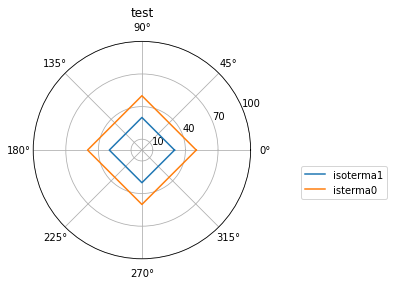

In [6]:
def mostrarVariasIsotermas (archivo_salida, radio_interno, radio_externo, cantidad_angulos, puntos_isoterma, titulo) :

    #r = puntos_isoterma
    
    theta = np.linspace(0, 2*np.pi, cantidad_angulos)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for iso_label, r in puntos_isoterma :
        r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
        ax.plot(theta, r, label=iso_label)
        ax.legend(bbox_to_anchor =(1.65, 0.45))
        
    ax.set_rticks([radio_interno+(radio_externo - radio_interno)/3*x for x in range(4)])
    ax.grid(True)

    ax.set_title(titulo)
    plt.savefig(archivo_salida)

mostrarVariasIsotermas("./test.png", 10, 100, 5, [("isoterma1",[30,30,30,30,70]),("isterma0",[50,50,50,50,20])], "test")

<ipython-input-8-fb6dee09607c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["radios"] = df_i["radios"].astype(int)
<ipython-input-8-fb6dee09607c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i["radios"] = df_i["radios"].astype(int)
<ipython-input-8-fb6dee09607c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

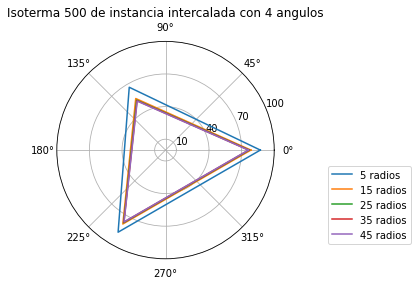

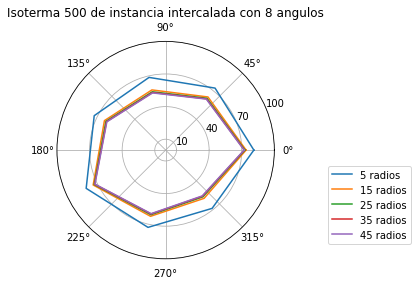

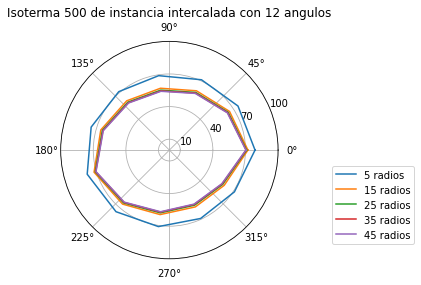

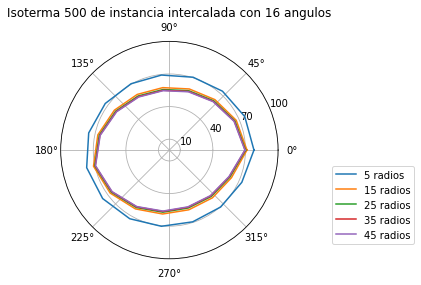

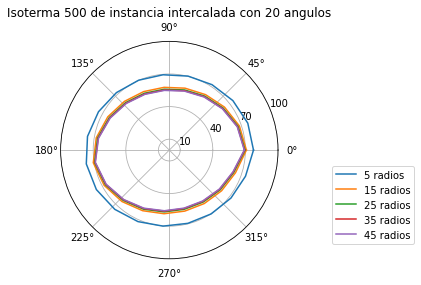

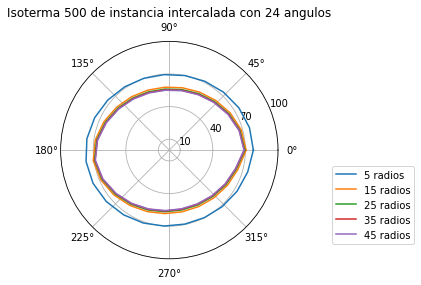

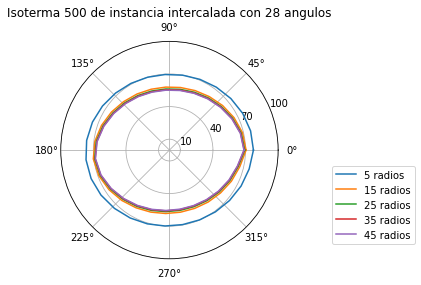

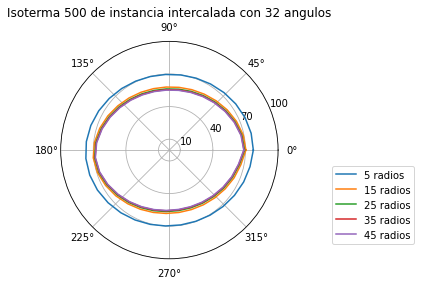

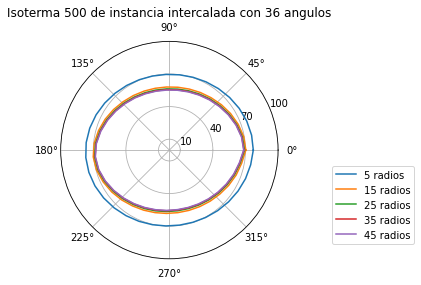

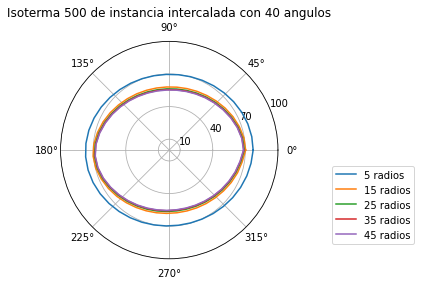

In [8]:
def calcularIsotermaUnicaInstancia (tipo_instancia) :
    df = df_instancia_unica[df_instancia_unica.instancia == tipo_instancia]
    df = df.reset_index()
    nombre_instancia = tipo_instancia.replace("_", " ")

    rango = range(5, 55, 5)
    if tipo_instancia == "instancia_intercalada" :
        rango = range(4, 44, 4)

    for i in rango :
        df_i = df[df["angulos"] == str(i)]
        df_i["radios"] = df_i["radios"].astype(int)
        df_i = df_i.sort_values("radios")
        df_i = df_i[df_i["radios"].isin(range(5, 55, 10))]
        df_i = df_i.reset_index()
                
        isotermas = []
        for _, row in df_i.iterrows() :
            temperaturas = np.array(list(map(float, row["lista_temperaturas"])))
            puntos_isoterma = []
            for rayo_de_temperaturas in temperaturas.reshape((int(row["radios"]), int(row["angulos"]))).T :
                punto = calcular_isoterma_para_un_angulo_dado(500, rayo_de_temperaturas)
                puntos_isoterma.extend([punto])
            if puntos_isoterma[1] != 0.0 :
                nombre_isoterma = f'{row["radios"]} radios'
                isotermas.append((nombre_isoterma, puntos_isoterma))    

        mostrarVariasIsotermas(f"./graficos/{tipo_instancia}/{tipo_instancia}_angulo_{i}.png", 10, 100,  i, isotermas, f"Isoterma 500 de {nombre_instancia} con {i} angulos" )


def calcularIsotermaMultiplesInstancias(tipo_instancia):
    df = df_multiples_instancias[df_multiples_instancias.instancia == tipo_instancia]

    nombre_instancia = tipo_instancia.replace("_", " ")
    for i in df.index :
        df_i = df.loc[i]
        
        isotermas = []
        for temperaturas in np.array(df_i.lista_temperaturas).reshape((int(df_i.numero_de_instancias), int(df_i.angulos)*int(df_i.radios))) :
            puntos_isoterma = []
            temperatura_min = round(min(list(map(float,temperaturas))),2)
            for rayo_de_temperaturas in temperaturas.reshape((int(df_i.radios), int(df_i.angulos))).T :
                punto = calcular_isoterma_para_un_angulo_dado(500, rayo_de_temperaturas)
                puntos_isoterma.extend([punto])
            if puntos_isoterma[1] != 0.0 :
                nombre_isoterma = f"{temperatura_min}°C exterior"
                isotermas.append((nombre_isoterma, puntos_isoterma))    

        mostrarVariasIsotermas(f"./graficos/{tipo_instancia}/{tipo_instancia}_{df_i.numero_de_instancias}_instancias.png", 10, 100, int(df_i.angulos), isotermas, f"Isoterma 500 de {nombre_instancia} con {df_i.numero_de_instancias} instancias")


def calcularIsotermaDeUnArchivo(tipo_instancia):
    if tipo_instancia == "instancia_ideal" or tipo_instancia == "instancia_intercalada" :
        calcularIsotermaUnicaInstancia(tipo_instancia)
    elif tipo_instancia == "instancia_prendido":
        calcularIsotermaMultiplesInstancias(tipo_instancia)

    
#calcularIsotermaDeUnArchivo("instancia_ideal")
calcularIsotermaDeUnArchivo("instancia_intercalada") 
#calcularIsotermaDeUnArchivo("instancia_prendido")  